# Campaign for selling personal loans

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.


The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.


The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

# 1. Read the column description and ensure you understand each attribute well

In [2]:
# Open and read xlsx file
wb = xlrd.open_workbook("TheraBank_Column_Description.xlsx")

#Set index
sheet = wb.sheet_by_index(0)

# Read all row and print
a = sheet.row_values(5)
print(a[1])
for i in range(7,21):
    a = sheet.row_values(i)
    print("{} : {}".format(a[1], a[2]))

Data Description:
ID : Customer ID
Age : Customer's age in completed years
Experience : #years of professional experience
Income : Annual income of the customer ($000)
ZIPCode : Home Address ZIP code.
Family : Family size of the customer
CCAvg : Avg. spending on credit cards per month ($000)
Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage : Value of house mortgage if any. ($000)
Personal Loan : Did this customer accept the personal loan offered in the last campaign?
Securities Account : Does the customer have a securities account with the bank?
CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
Online : Does the customer use internet banking facilities?
CreditCard : Does the customer use a credit card issued by UniversalBank?


## ------------------------------------------------Question1 Complete------------------------------------------------

# 2. Study the data distribution in each attribute, share your findings. (10 points)

In [3]:
loan_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv", index_col="ID")

In [4]:
loan_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Let us check whether any of the columns has any value other than numeric
loan_df[~loan_df.applymap(np.isreal).all(1)]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,


In [6]:
# Check null value is present in dataset or not
loan_df.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# Check null value is present in dataset or not
loan_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Create dummpy variable for "Education" as it is categorical  variable

In [8]:
# Create dummpy variable for "Education" as it is categorical  variable
loan_df['Education'] = loan_df['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Professional'})
loan_df = pd.get_dummies(loan_df,columns=["Education"])
loan_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergrad
ID,,,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,0,0,1,0,0,0,0,0,1
2,45,19,34,90089,3,1.5,0,0,1,0,0,0,0,0,1
3,39,15,11,94720,1,1.0,0,0,0,0,0,0,0,0,1
4,35,9,100,94112,1,2.7,0,0,0,0,0,0,1,0,0
5,35,8,45,91330,4,1.0,0,0,0,0,0,1,1,0,0


### Check any value is negative or not. If present handle accordingly.

In [9]:
# Check any value is negative or not.
neg_df = loan_df[(loan_df < 0).any(1)]

In [10]:
neg_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergrad
ID,,,,,,,,,,,,,,,
90,25,-1,113,94303,4,2.30,0,0,0,0,0,1,0,1,0
227,24,-1,39,94085,2,1.70,0,0,0,0,0,0,1,0,0
316,24,-2,51,90630,3,0.30,0,0,0,0,1,0,0,1,0
452,28,-2,48,94132,2,1.75,89,0,0,0,1,0,0,1,0
525,24,-1,75,93014,4,0.20,0,0,0,0,1,0,0,0,1


### Here "Experience" column is having negative value, which is not correct. I used DataFrame.abs() function to convert negative to positive value.

In [11]:
loan_df["Experience"]  = loan_df["Experience"].abs()

In [12]:
# Check again if negative value is present or not
neg_df = loan_df[(loan_df < 0).any(1)]

In [13]:
neg_df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergrad
ID,,,,,,,,,,,,,,,


### Use describe method to check mean,median and standard deviation of each feature

In [14]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


### "ZIP Code" is categorical variable and there are 467 ZIP codes. We can create 467 dummy variable but that will make entire dataframe very sparse. So as for now I have dropped "ZIP Code" from dataframe.

In [15]:
print("Number of ZIP Code:{}".format(loan_df['ZIP Code'].nunique()))

Number of ZIP Code:467


In [16]:
# Drop "ZIP Code"
loan_df.drop(["ZIP Code"], axis=1, inplace=True)

In [17]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


## Plot histogram of all variables and varify skewness is present or not

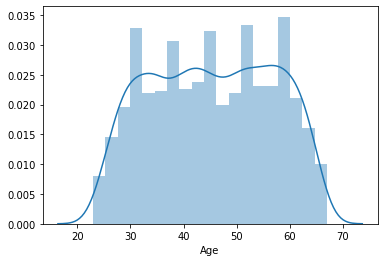

In [18]:
sns.distplot(loan_df['Age'],label=True)

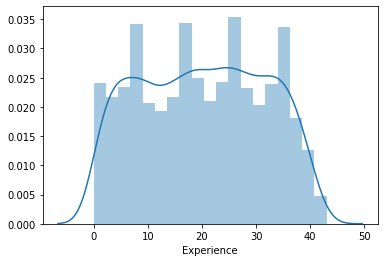

In [19]:
sns.distplot(loan_df['Experience'],label=True)

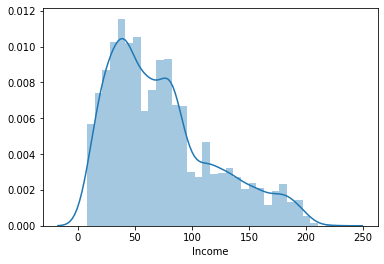

In [20]:
sns.distplot(loan_df['Income'],label=True)

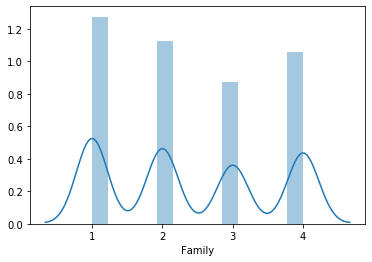

In [21]:
sns.distplot(loan_df['Family'],label=True)

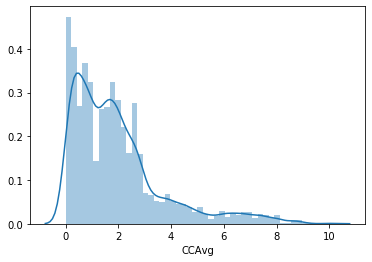

In [22]:
sns.distplot(loan_df['CCAvg'],label=True)

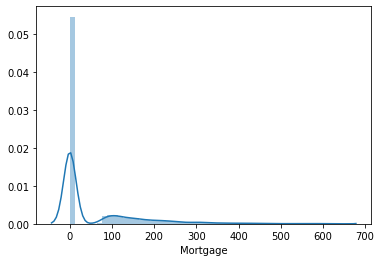

In [23]:
sns.distplot(loan_df['Mortgage'],label=True)

### From histogram we can find that skewness is present in 'Income','CCAvg' and 'Mortgage' variable

# Detect Outliers

In [24]:
Q1 = loan_df.quantile(0.25)
Q3 = loan_df.quantile(0.75)
IQR = Q3 - Q1
print("IQR:")
print(IQR)

IQR:
Age                        20.0
Experience                 20.0
Income                     59.0
Family                      2.0
CCAvg                       1.8
Mortgage                  101.0
Personal Loan               0.0
Securities Account          0.0
CD Account                  0.0
Online                      1.0
CreditCard                  1.0
Education_Graduate          1.0
Education_Professional      1.0
Education_Undergrad         1.0
dtype: float64


In [25]:
for col in loan_df.columns:
    loan_o = loan_df[(loan_df[col] < (Q1[col] - 1.5*IQR[col])) | (loan_df[col] > (Q3[col] + 1.5*IQR[col]))]
    if len(loan_o) > 0:
        print("Outlier is present in: {}".format(col))

Outlier is present in: Income
Outlier is present in: CCAvg
Outlier is present in: Mortgage
Outlier is present in: Personal Loan
Outlier is present in: Securities Account
Outlier is present in: CD Account


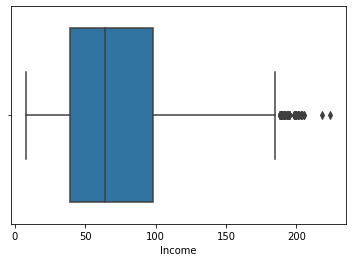

In [26]:
sns.boxplot(loan_df["Income"])

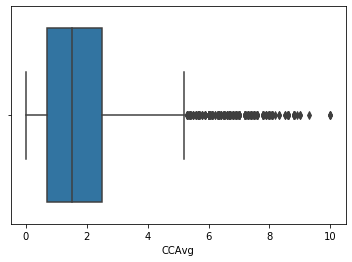

In [27]:
sns.boxplot(loan_df["CCAvg"])

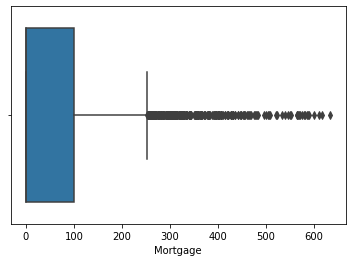

In [28]:
sns.boxplot(loan_df["Mortgage"])

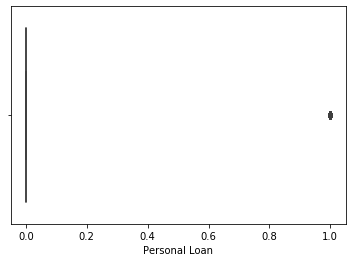

In [29]:
sns.boxplot(loan_df["Personal Loan"])

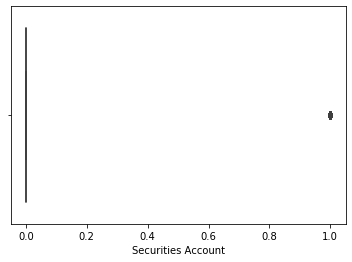

In [30]:
sns.boxplot(loan_df["Securities Account"])

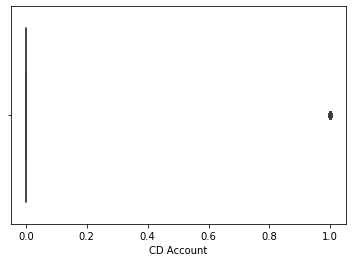

In [31]:
sns.boxplot(loan_df["CD Account"])

#### From IQR calculation and boxplot it can be concluded that outlier is present in "Income", "CCAvg", "Mortgage", "Personal Loan", "Securities Account" and "CD Account" variable.

#### "Personal Loan", "Securities Account" and "CD Account" are categorical variable, and that can be ignored, hence outlier present in "Income", "CCAvg" and "Mortgage" variable which is inline with histogram result.

# Pair Plot

C:\Users\Chandan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Chandan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


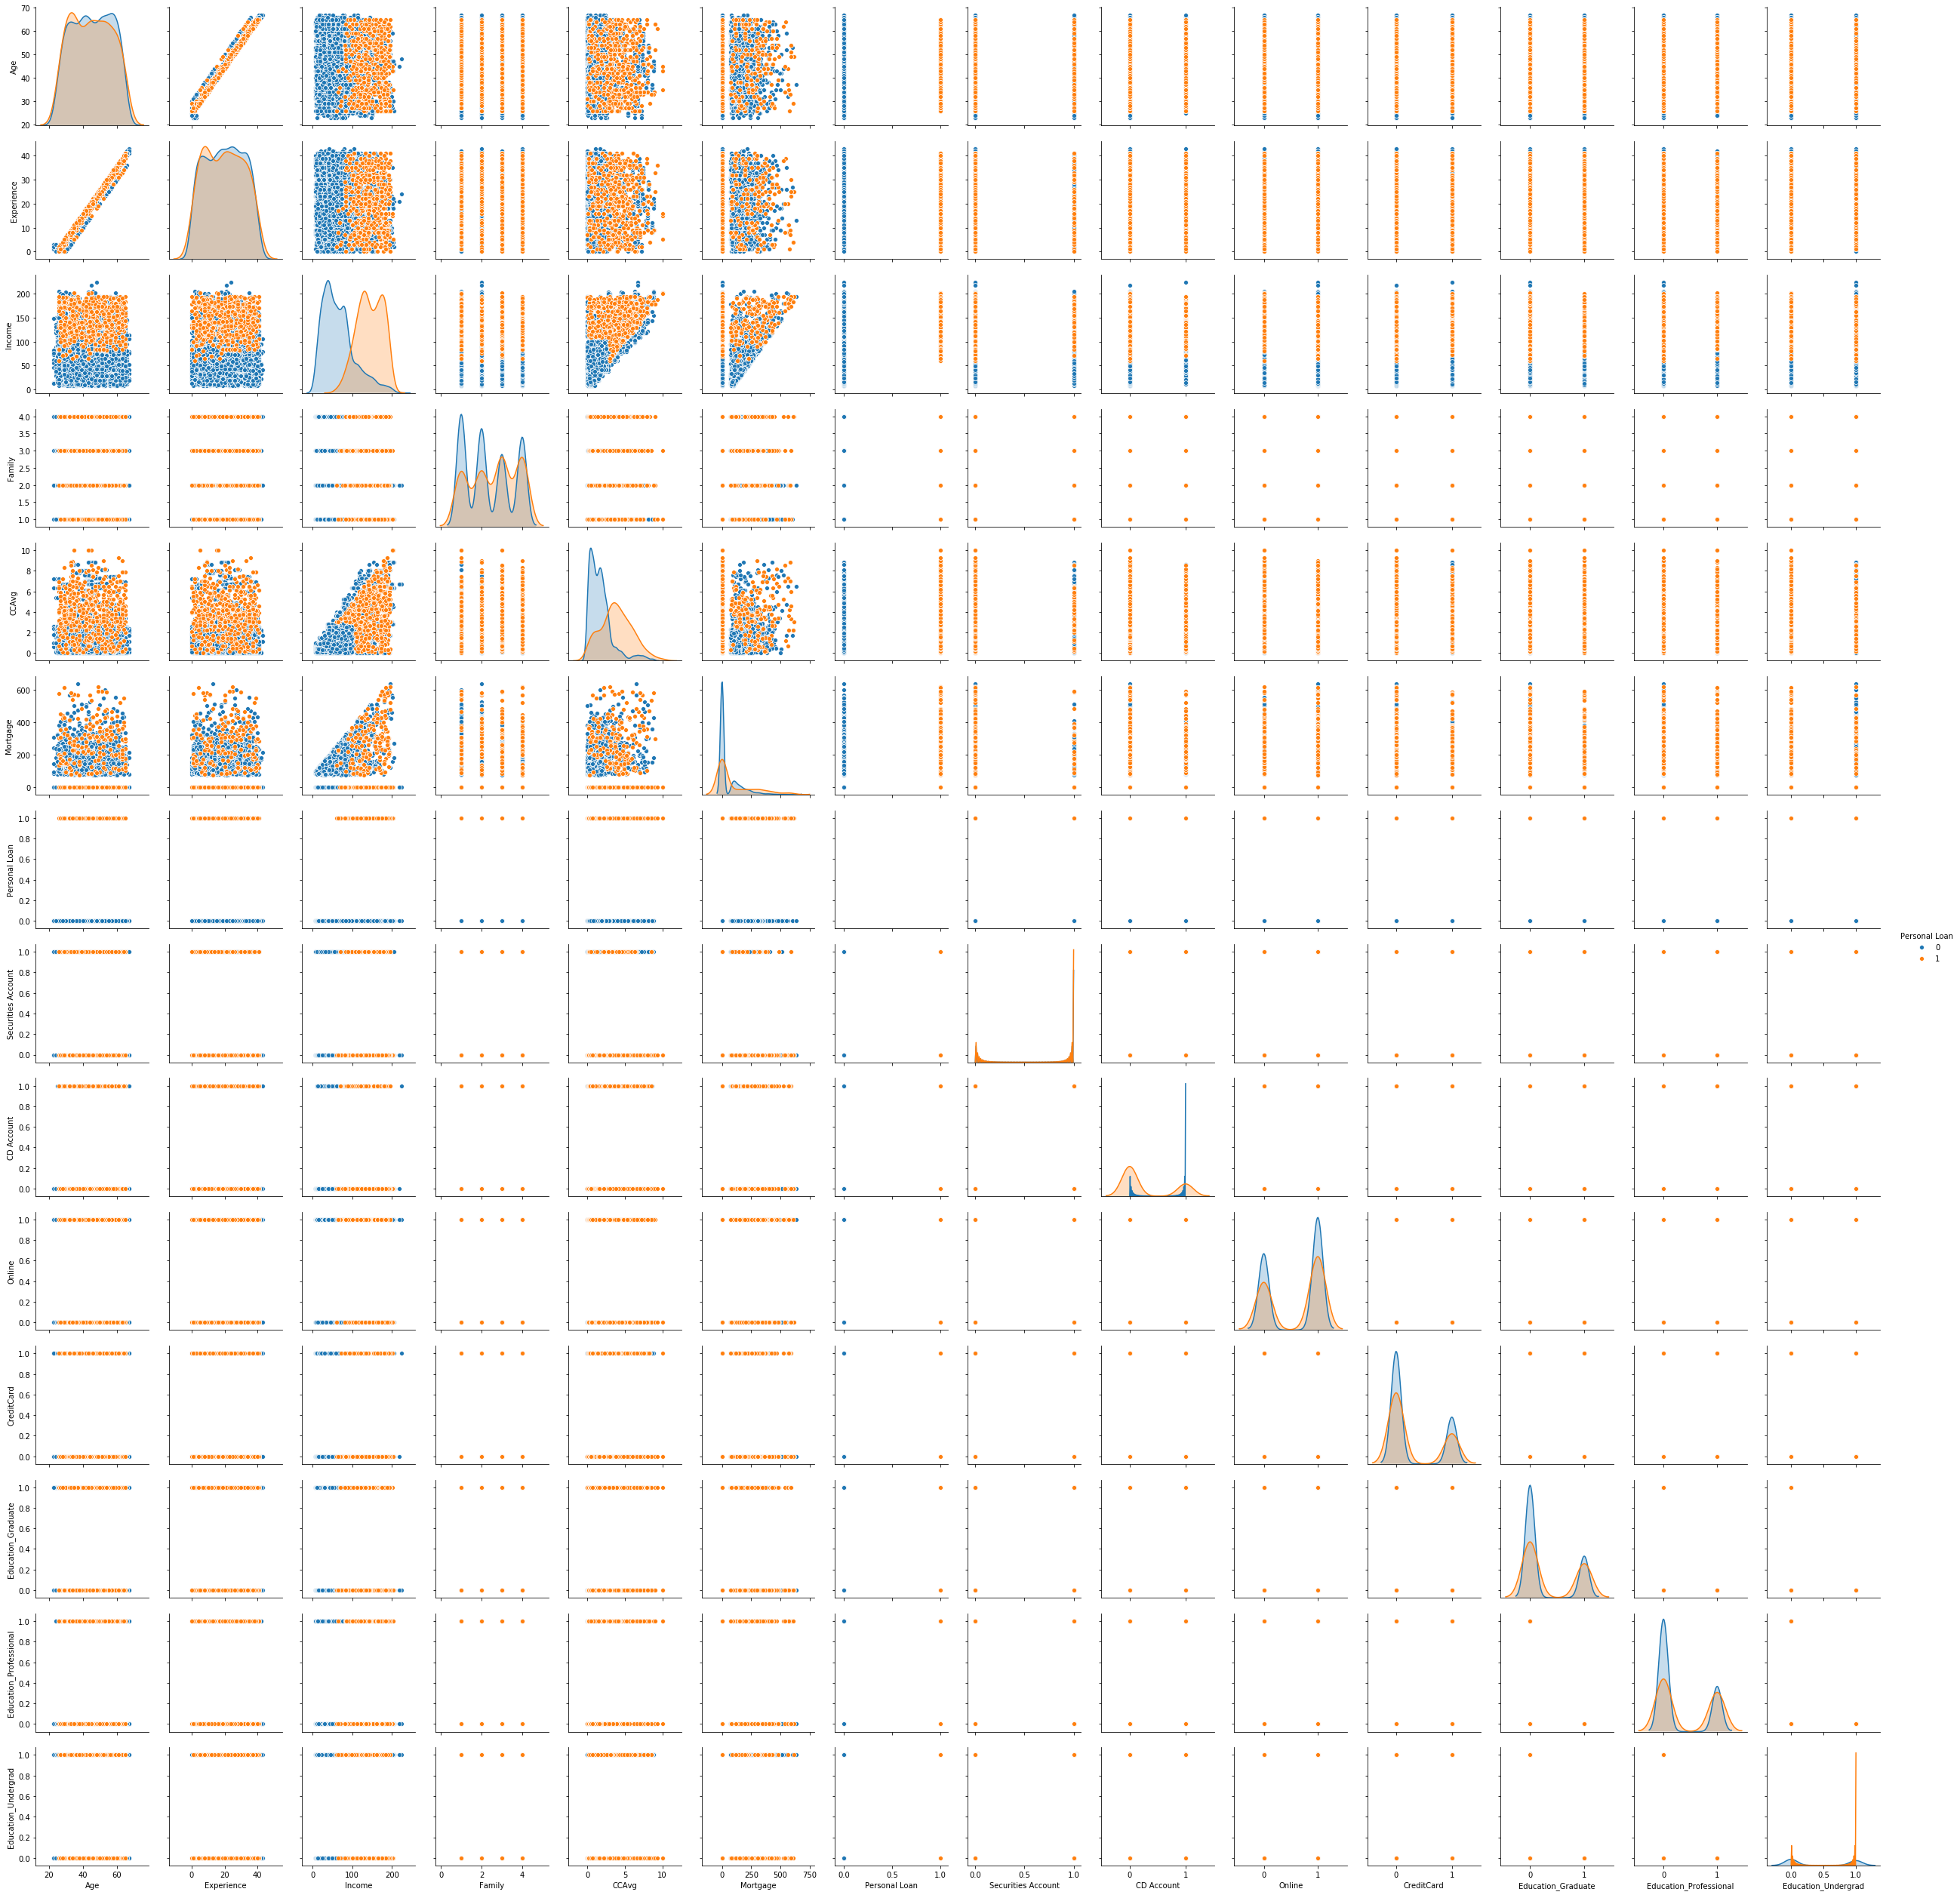

In [32]:
sns.pairplot(loan_df,hue="Personal Loan")

# Boxplot

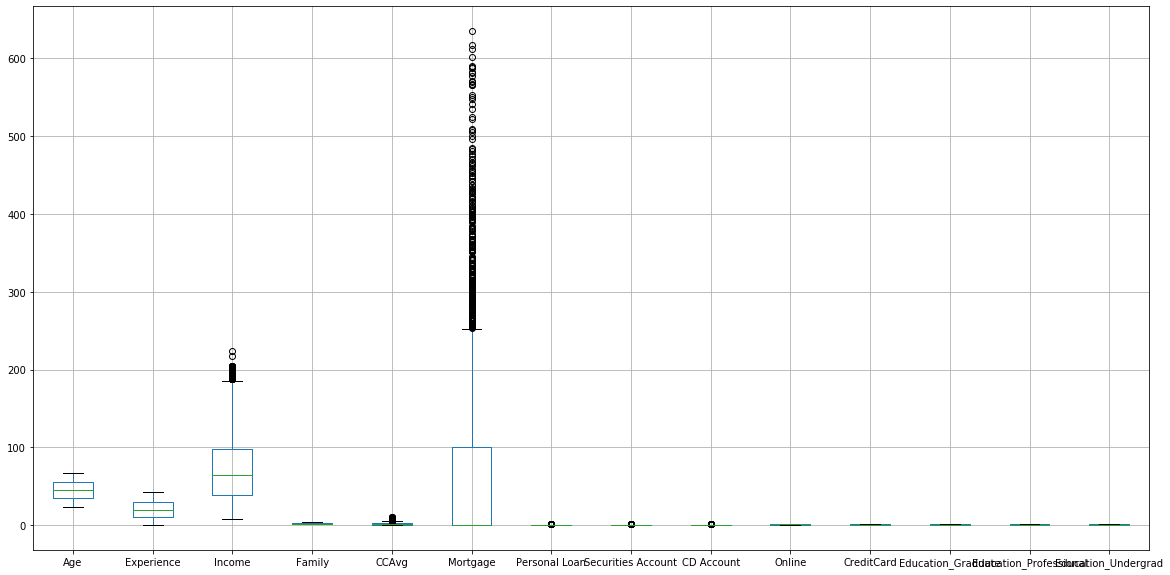

In [33]:
loan_df.boxplot(figsize=(20,10))

## ------------------------------------------------Question2 Complete------------------------------------------------

# 3. Get the target column distribution. 

In [34]:
Target_Col = loan_df['Personal Loan']
Target_Col.head()

ID
1    0
2    0
3    0
4    0
5    0
Name: Personal Loan, dtype: int64

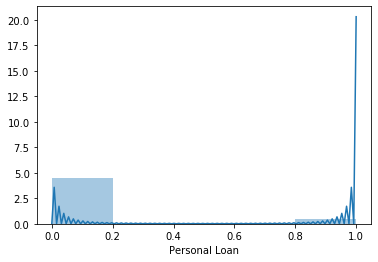

In [35]:
sns.distplot(Target_Col,bins=5)

In [36]:
Target_Col.value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

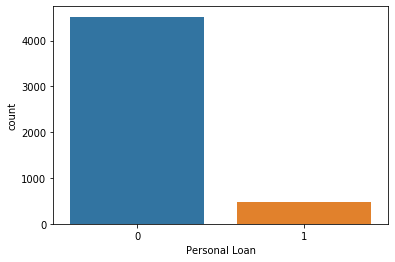

In [37]:
sns.countplot(Target_Col)

## Data is imbalanced because class 1 count is very less than class 0.

## ------------------------------------------------Question3 Complete------------------------------------------------

# 4. Split the data into training and test set in the ratio of 70:30 respectively

In [38]:
X = loan_df.drop(labels=["Personal Loan"], axis=1)
Y = loan_df['Personal Loan']

In [39]:
# Drop one of the dummy variable
X.drop(["Education_Undergrad"], axis=1,inplace=True)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Split X and y into training and test set in 75:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=10)

## ------------------------------------------------Question4 Complete------------------------------------------------

# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics

In [43]:
X_train_scaled_log = preprocessing.scale(X_train)
X_test_scaled_log = preprocessing.scale(X_test)

In [44]:
Log_model = LogisticRegression(penalty='none', solver='newton-cg')
Log_model.fit(X_train_scaled_log, y_train)

# Predict
y_pred_log = Log_model.predict(X_test_scaled_log)

Log_score = Log_model.score(X_test_scaled_log, y_test)
print("Training Score: {}".format(Log_score))

Training Score: 0.9613333333333334


In [45]:
print(metrics.confusion_matrix(y_test, y_pred_log))

[[1350   10]
 [  48   92]]


In [46]:
# Print Classification Report
print(metrics.classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.90      0.66      0.76       140

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



# K-NN Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [48]:
test_accuracy = {}
for i in range(2,10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=10)
    sc = StandardScaler()
    x_train_sc_knn = sc.fit_transform(X_train)
    x_test_sc_knn = sc.fit_transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(x_train_sc_knn, y_train)
    y_pred_knn = knn.predict(x_test_sc_knn)
    test_accuracy[i] = metrics.accuracy_score(y_test,y_pred_knn)

for k,v in test_accuracy.items():
    print("K:{}, Test Accuracy{}".format(k,v))

K:2, Test Accuracy0.9586666666666667
K:3, Test Accuracy0.9646666666666667
K:4, Test Accuracy0.9546666666666667
K:5, Test Accuracy0.962
K:6, Test Accuracy0.9553333333333334
K:7, Test Accuracy0.96
K:8, Test Accuracy0.954
K:9, Test Accuracy0.956


In [49]:
test_accuracy = sorted(test_accuracy.items(), key=lambda kv:kv[1], reverse=True)
optimal_k = test_accuracy[0][0]
print("optimal_k: {}".format(optimal_k))

optimal_k: 3


In [50]:
#Build final K-NN model with optimal k value
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=10)
sc = StandardScaler()
x_train_sc_knn = sc.fit_transform(X_train)
x_test_sc_knn = sc.fit_transform(X_test)
    
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn = knn.fit(x_train_sc_knn, y_train)
y_pred_knn = knn.predict(x_test_sc_knn)
print("Test Score{}".format(metrics.accuracy_score(y_test,y_pred_knn)))

Test Score0.9646666666666667


In [51]:
print(metrics.confusion_matrix(y_test, y_pred_knn))

[[1353    7]
 [  46   94]]


In [52]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.93      0.67      0.78       140

    accuracy                           0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



# Naïve Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X, Y, test_size=0.30 , random_state=10)

In [55]:
model_NB = GaussianNB()
model_NB.fit(X_train_NB, y_train_NB)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
y_pred_NB = model_NB.predict(X_test_NB)

In [57]:
print(metrics.confusion_matrix(y_test_NB, y_pred_NB))

[[1236  124]
 [  56   84]]


In [58]:
print(metrics.classification_report(y_test_NB, y_pred_NB))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.40      0.60      0.48       140

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.91      0.88      0.89      1500



## ------------------------------------------------Question5 Complete------------------------------------------------

# 6. Print the confusion matrix for all the above models (10 points)

## Confusion matrix and Classification Report of Logistic Regression

In [59]:
print("Logistic Regression Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_pred_log))

Logistic Regression Confusion Matrix: 
[[1350   10]
 [  48   92]]


In [60]:
print("Logistic Regression Classification Report: ")
print(metrics.classification_report(y_test,y_pred_log))

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.90      0.66      0.76       140

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



## Confusion matrix and Classification Report of K-NN

In [61]:
print("K-NN Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, y_pred_knn))

K-NN Confusion Matrix: 
[[1353    7]
 [  46   94]]


In [62]:
print("K-NN Classification Report: ")
print(metrics.classification_report(y_test, y_pred_knn))

K-NN Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.93      0.67      0.78       140

    accuracy                           0.96      1500
   macro avg       0.95      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500



## Confusion matrix and Classification Report of Naïve Bayes

In [63]:
print("Naïve Bayes Confusion Matrix: ")
print(metrics.confusion_matrix(y_test_NB, y_pred_NB))

Naïve Bayes Confusion Matrix: 
[[1236  124]
 [  56   84]]


In [64]:
print("Naïve Bayesn Classification Report: ")
print(metrics.classification_report(y_test_NB, y_pred_NB))

Naïve Bayesn Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.40      0.60      0.48       140

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.91      0.88      0.89      1500



## ------------------------------------------------Question6 Complete------------------------------------------------

# 7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

### Use KFold cross validation for finding best model

In [65]:
from sklearn import model_selection

In [66]:
seed = 1
kFold = model_selection.KFold(n_splits=10,random_state=seed)

### Use KFold for Logistic Regression

In [67]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

In [68]:
modelSel_log = LogisticRegression(penalty='none', solver='newton-cg')

In [69]:
result = model_selection.cross_val_score(modelSel_log, x_sc, Y, scoring='r2', cv=kFold)

In [70]:
print("R2: %.3f Std: (%.3f)" % (result.mean(), result.std()))

R2: 0.509 Std: (0.077)


### Use KFold for K-NN

In [71]:
modelSel_knn = KNeighborsClassifier(n_neighbors=3)

In [72]:
result = model_selection.cross_val_score(modelSel_knn, x_sc, Y, scoring='r2', cv=kFold)

In [73]:
print("R2: %.3f Std: (%.3f)" % (result.mean(), result.std()))

R2: 0.589 Std: (0.084)


### Use KFold for Naïve Bayes

In [74]:
modelSel_NB = GaussianNB()

In [75]:
result = model_selection.cross_val_score(modelSel_NB, X, Y, scoring='r2', cv=kFold)

In [76]:
print("R2: %.3f Std: (%.3f)" % (result.mean(), result.std()))

R2: -0.386 Std: (0.214)


## k-NN is the best model for this dataset, reasoning mentioned below.

Here I have used KFold cross validation with n_splits=10 for finding best model. R2 is highest for k-NN and difference between std. of k-NN and Logistic Refgression is very less. So in my view k-NN preformed best on this dataset. 

Apart from this we can also see **classification_report** for all models. From **classification_report** it is found that accuracy of Logistic and K-NN is same, but in this case **accuracy** is not good metric because data is unbalanced. **Instead we can rely on f1-score of class-1.** 

**k-NN model has highest f1-score for class-1, hence it can be conluded that k-NN preformed best of this dataset.**

## ------------------------------------------------Question7 Complete------------------------------------------------